In [ ]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive onto the '/content/drive' directory
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd  # pandas for data manipulation
import seaborn as sns  # seaborn for visualization
import matplotlib.pyplot as plt  # matplotlib for plotting
from sklearn.model_selection import train_test_split, cross_val_score  # for splitting data and cross-validation
from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # for evaluating model performance
import numpy as np

In [ ]:
# Define the column names since the dataset does not contain headers
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the iris dataset
iris_df = pd.read_csv('/content/drive/My Drive/SHIVAM_2246032/iris.data', header=None, names=column_names)

# Load the Bezdek's iris dataset
bezdek_iris_df = pd.read_csv('/content/drive/My Drive/SHIVAM_2246032/bezdekIris.data', header=None, names=column_names)


In [ ]:
# Checking for duplicate entries in the datasets
# Count and print the number of duplicate entries in iris data
print(f"iris.data duplicates: {iris_df.duplicated().sum()}")

# Count and print the number of duplicate entries in bezdekIris data
print(f"bezdekIris.data duplicates: {bezdek_iris_df.duplicated().sum()}")

# Drop the duplicates from both DataFrames
# Remove duplicate entries from iris data
iris_df = iris_df.drop_duplicates()

# Remove duplicate entries from bezdekIris data
bezdek_iris_df = bezdek_iris_df.drop_duplicates()

# Check for differences between the two datasets
# Concatenate both datasets and drop duplicates to find differences
iris_diff = pd.concat([iris_df, bezdek_iris_df]).drop_duplicates(keep=False)

# Print the number of differences between datasets
print(f"Differences between datasets: {iris_diff.shape[0]}")

combined_df = pd.concat([iris_df, bezdek_iris_df]).drop_duplicates()
combined_df.shape[0]

iris.data duplicates: 3
bezdekIris.data duplicates: 1
Differences between datasets: 2


149

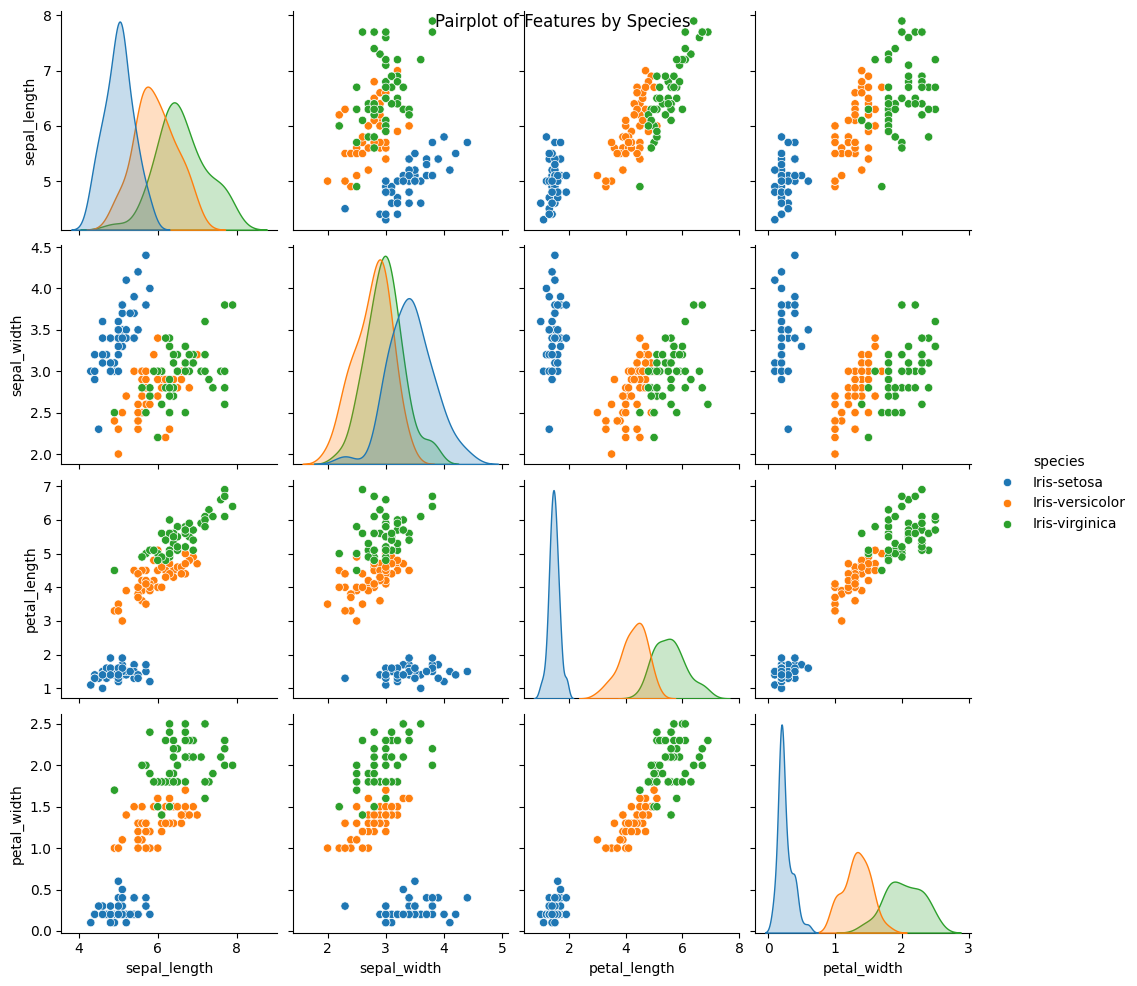

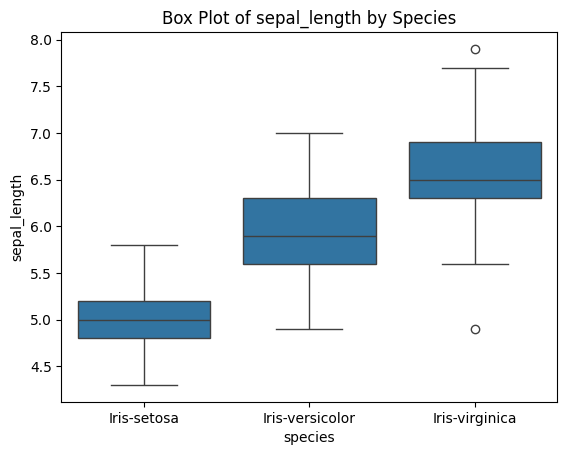

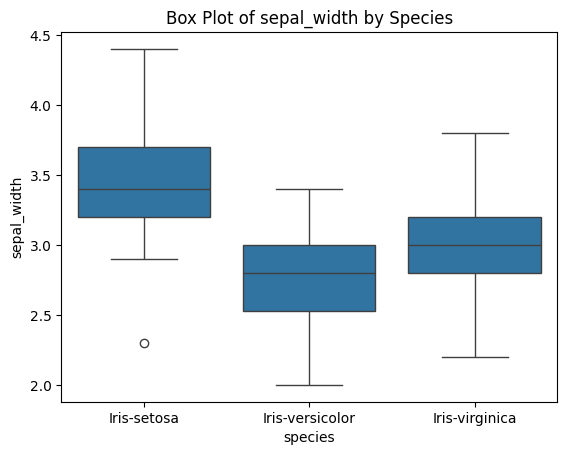

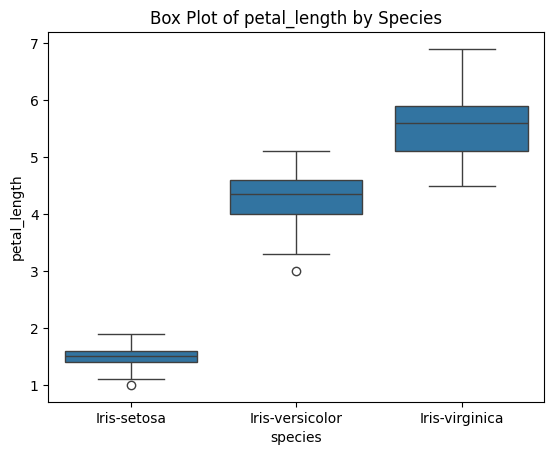

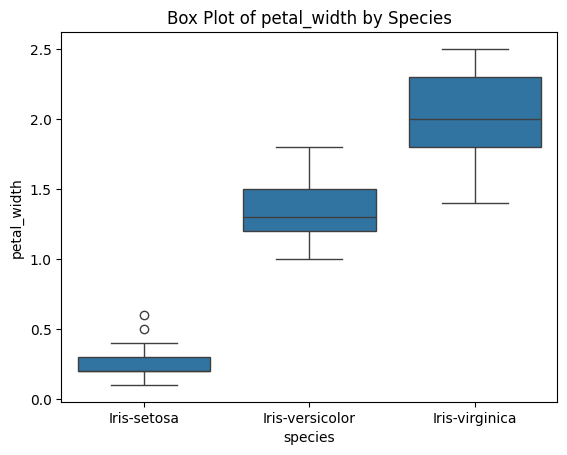

In [ ]:
# Visualize the distribution of each feature for different species using pairplot
sns.pairplot(iris_df, hue='species')
plt.suptitle('Pairplot of Features by Species')
plt.show()

# Display box plots for each feature by species
for feature in column_names[:-1]:  # Exclude the 'species' column
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'Box Plot of {feature} by Species')
    plt.show()


Accuracy for different values of K:
K = 1: Accuracy = 0.9636
K = 2: Accuracy = 0.9036
K = 3: Accuracy = 0.9636
K = 4: Accuracy = 0.9236
K = 5: Accuracy = 0.9627
K = 6: Accuracy = 0.9709
K = 7: Accuracy = 0.9718
K = 8: Accuracy = 0.9727
K = 9: Accuracy = 0.9818
K = 10: Accuracy = 0.9818
K = 11: Accuracy = 0.9727
K = 12: Accuracy = 0.9627
K = 13: Accuracy = 0.9536
K = 14: Accuracy = 0.9627
K = 15: Accuracy = 0.9727
K = 16: Accuracy = 0.9718
K = 17: Accuracy = 0.9718
K = 18: Accuracy = 0.9518
K = 19: Accuracy = 0.9518
K = 20: Accuracy = 0.9418

Best K Value: 9 with Accuracy: 0.9818


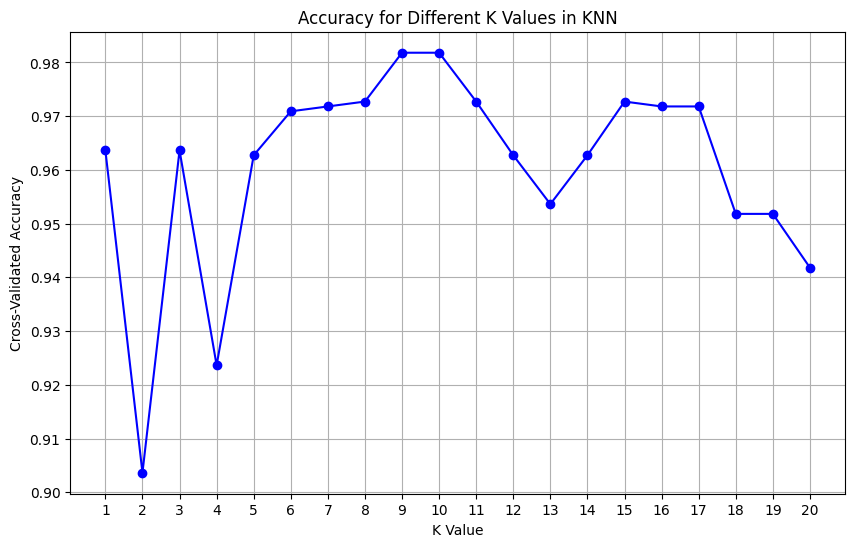

In [ ]:

# Concatenate the two datasets and remove exact duplicates
combined_df = pd.concat([iris_df, bezdek_iris_df]).drop_duplicates()

# Split the combined dataset into training and testing sets
X_combined = combined_df.drop('species', axis=1)
y_combined = combined_df['species']
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# Apply scaling
scaler_combined = StandardScaler()
X_train_combined_scaled = scaler_combined.fit_transform(X_train_combined)
X_test_combined_scaled = scaler_combined.transform(X_test_combined)

# Cross-validation setup
k_range = range(1, 21)
k_scores = []

print("Accuracy for different values of K:")

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_combined_scaled, y_train_combined, cv=10, scoring='accuracy')
    mean_score = scores.mean()
    k_scores.append(mean_score)
    print(f"K = {k}: Accuracy = {mean_score:.4f}")

# Identify and print the best K value and its accuracy
best_k = k_range[np.argmax(k_scores)]
best_score = max(k_scores)
print(f"\nBest K Value: {best_k} with Accuracy: {best_score:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='-', color='blue')
plt.title('Accuracy for Different K Values in KNN')
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Evaluation of KNN Model with Best K Value:
-------------------------------------------------
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.77      0.87        13

       accuracy                           0.93        45
      macro avg       0.94      0.92      0.92        45
   weighted avg       0.95      0.93      0.93        45



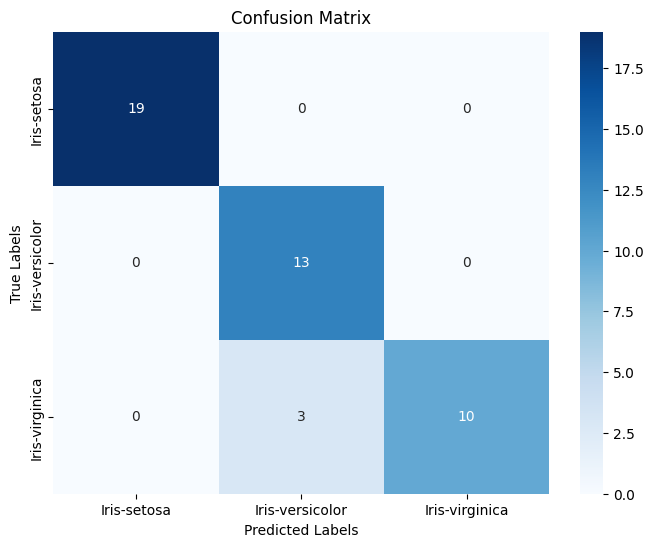

Accuracy: 0.9333


In [ ]:
# Train the KNN model with the best K value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_combined_scaled, y_train_combined)

# Predict on the test set
y_pred_best = knn_best.predict(X_test_combined_scaled)

# Evaluate the model
print("Evaluation of KNN Model with Best K Value:")
print("-------------------------------------------------")

# Classification Report
print("Classification Report:")
print(classification_report(y_test_combined, y_pred_best))

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test_combined, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_combined), yticklabels=np.unique(y_combined))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy_best = accuracy_score(y_test_combined, y_pred_best)
print(f"Accuracy: {accuracy_best:.4f}")

# Additionally, plotting the decision boundaries if necessary
# Note: Decision boundary plots might require dimensionality reduction if working with more than 2 features


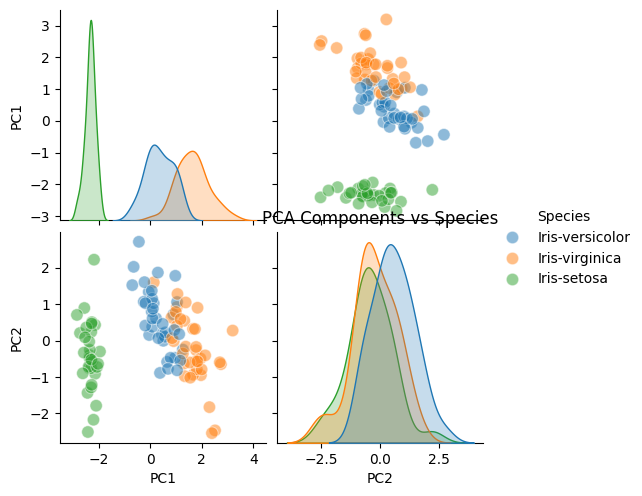

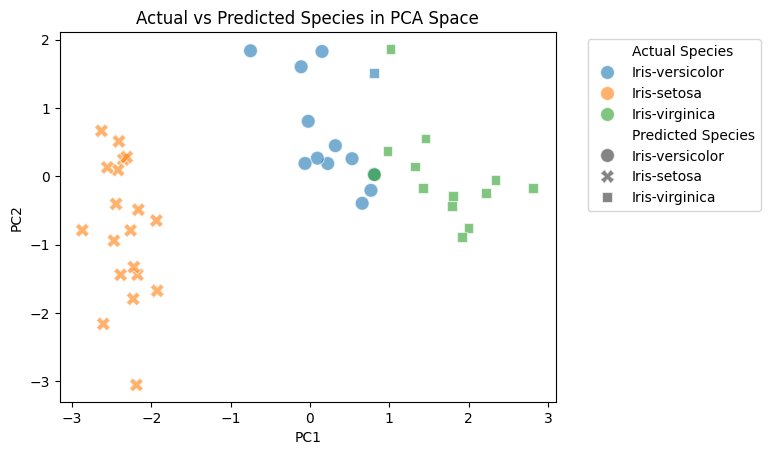

Accuracy on test set: 0.9556


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming iris_df and bezdek_iris_df are loaded and combined as before
# Concatenate the two datasets and remove exact duplicates
combined_df = pd.concat([iris_df, bezdek_iris_df]).drop_duplicates()

# Split the combined dataset into features (X) and target (y)
X_combined = combined_df.drop('species', axis=1)
y_combined = combined_df['species']

# Split the data into training and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.3, random_state=42)

# Apply scaling
scaler = StandardScaler()
X_train_combined_scaled = scaler.fit_transform(X_train_combined)
X_test_combined_scaled = scaler.transform(X_test_combined)

# Reduce the dimensionality of the data to two dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_combined_scaled)
X_test_pca = pca.transform(X_test_combined_scaled)

# Identify the best k value as previously determined
best_k = 9  # Placeholder, replace with actual best_k from your analysis

# Re-train the KNN model on the 2D training data
knn_best_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_best_pca.fit(X_train_pca, y_train_combined)

# Create a DataFrame with the PCA components and actual species labels for visualization
pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y_train_combined.values

# Visualizing with seaborn pairplot
sns.pairplot(pca_df, hue='Species', plot_kws={'alpha': 0.5, 's': 80})
plt.title('PCA Components vs Species')
plt.show()

# Predict the species labels for the test set reduced to two principal components
y_pred_pca = knn_best_pca.predict(X_test_pca)

# Creating a DataFrame for visualization of the test set in the PCA-reduced space
test_pca_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
test_pca_df['Actual Species'] = y_test_combined.values
test_pca_df['Predicted Species'] = y_pred_pca

# Plotting the actual vs predicted species in PCA space
sns.scatterplot(data=test_pca_df, x='PC1', y='PC2', hue='Actual Species', style='Predicted Species', alpha=0.6, s=100)
plt.title('Actual vs Predicted Species in PCA Space')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Optionally, compute and display the accuracy of the model on the test set
accuracy = accuracy_score(y_test_combined, y_pred_pca)
print(f"Accuracy on test set: {accuracy:.4f}")
